In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
import pickle

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
BASE_FILE_PATH = '/content/drive/MyDrive/Colab Notebooks/Final Project'
print(os.listdir(BASE_FILE_PATH))

['Keys', 'Setting up connection with Git-Hub.ipynb', 'entries.csv', 'summoner_details.csv', 'updated_dataset.csv', 'filtered_dataset.csv', 'filtered_dataset.gsheet', 'filtered_+30_matches_dataset.csv', 'EDA.ipynb', 'merged_dataset.csv', 'Merging match with entries and classifying accounts.ipynb', 'merged_dataset.gsheet', 'Feature engineering and cleaning vol 1.ipynb', 'dataset_after_normalization.csv', 'keepign only win feature .ipynb', 'Models without data normalization.ipynb', 'Normalization_Parameters.csv', 'Normalization_Parameters_by_Team_Position.csv', 'summoner_ids_used_in_model.csv', 'gbm_model.pkl', 'train_df.csv', 'test_df.csv', 'validation_df.csv', 'processed_train_df.csv', 'Normalization_Parameters_by_Game_Mode.csv', 'processed_test_df.csv', 'random_forest_model.pkl', 'processed_validation_df.csv']


In [38]:
train_df = pd.read_csv(os.path.join(BASE_FILE_PATH, 'processed_train_df.csv'))
test_df = pd.read_csv(os.path.join(BASE_FILE_PATH, 'processed_test_df.csv'))

In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   deaths_normalized_late                1000 non-null   float64
 1   kills_normalized_late                 1000 non-null   float64
 2   assists_normalized_late               1000 non-null   float64
 3   game_duration_normalized_late         1000 non-null   float64
 4   total_minions_killed_normalized_late  1000 non-null   float64
 5   gold_earned_normalized_late           1000 non-null   float64
 6   total_damage_dealt_normalized_late    1000 non-null   float64
 7   total_damage_taken_normalized_late    1000 non-null   float64
 8   deaths_normalized_mid                 1000 non-null   float64
 9   kills_normalized_mid                  1000 non-null   float64
 10  assists_normalized_mid                1000 non-null   float64
 11  game_duration_norm

In [40]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   deaths_normalized_late                200 non-null    float64
 1   kills_normalized_late                 200 non-null    float64
 2   assists_normalized_late               200 non-null    float64
 3   game_duration_normalized_late         200 non-null    float64
 4   total_minions_killed_normalized_late  200 non-null    float64
 5   gold_earned_normalized_late           200 non-null    float64
 6   total_damage_dealt_normalized_late    200 non-null    float64
 7   total_damage_taken_normalized_late    200 non-null    float64
 8   deaths_normalized_mid                 200 non-null    float64
 9   kills_normalized_mid                  200 non-null    float64
 10  assists_normalized_mid                200 non-null    float64
 11  game_duration_norma

In [41]:
# Prepare features and target for training data
X_train = train_df.drop(['binary_time_group'], axis=1)
y_train = train_df['binary_time_group']

# Prepare features and target for testing data
X_test = test_df.drop(['binary_time_group'], axis=1)
y_test = test_df['binary_time_group']

# Scale features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [42]:
#save scaler to use it also in the validation
with open(os.path.join(BASE_FILE_PATH, 'scaler.pkl'), 'wb') as file:
    pickle.dump(scaler, file)

In [43]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)  # Increased max_iter
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_scaled, y_train)
y_pred_rf = random_forest.predict(X_test_scaled)

# Gradient Boosting Machine
gbm = LGBMClassifier(random_state=42)
gbm.fit(X_train_scaled, y_train)
y_pred_gbm = gbm.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log_reg))
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Gradient Boosting Machine Performance:")
print(classification_report(y_test, y_pred_gbm))

[LightGBM] [Info] Number of positive: 500, number of negative: 500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000466 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5092
[LightGBM] [Info] Number of data points in the train set: 1000, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

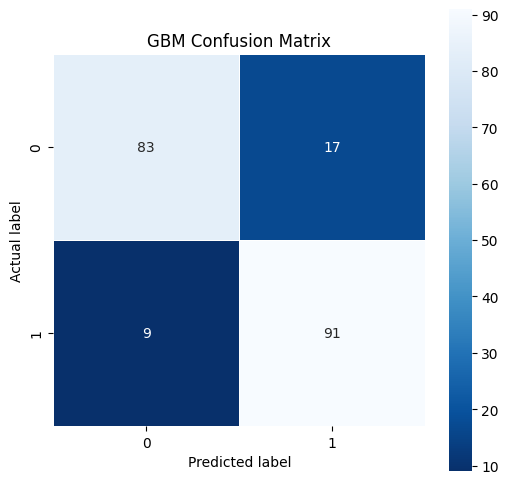

In [44]:
cm_gbm = confusion_matrix(y_test, y_pred_gbm)  # Ensure both are string or both are numeric
plt.figure(figsize=(6,6))
sns.heatmap(cm_gbm, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('GBM Confusion Matrix')
plt.show()

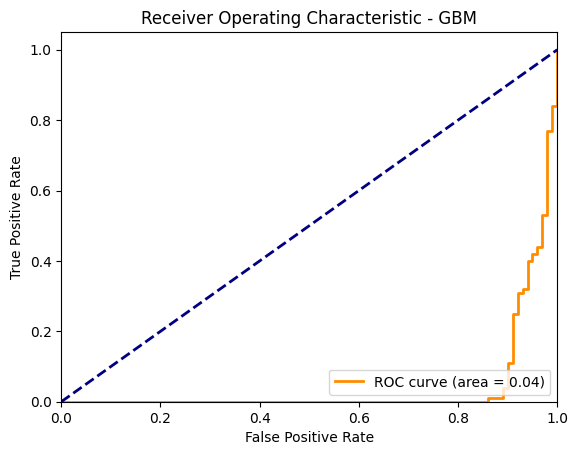

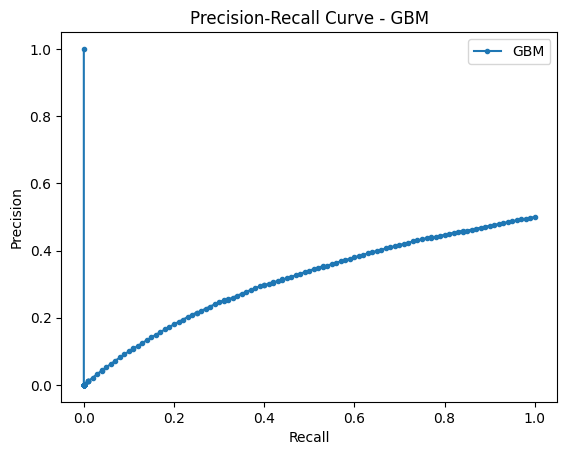

In [45]:
# ROC Curve for GBM
fpr, tpr, thresholds = roc_curve(y_test.replace({'Active': 1, 'Inactive': 0}), gbm.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - GBM')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test.replace({'Active': 1, 'Inactive': 0}), gbm.predict_proba(X_test_scaled)[:, 1])
plt.plot(recall, precision, marker='.', label='GBM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - GBM')
plt.legend()
plt.show()

In [46]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,569 (21.75 KB)

 Trainable params: 5,569 (21.75 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# Convert categorical binary_time_group to numeric
y_train = y_train.map({'Active': 1, 'Inactive': 0}).astype('float')

In [48]:
# Check if conversion was successful
print(y_train.dtype)

# Re-run the model training
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

float64
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5260 - loss: 0.6912 - val_accuracy: 0.5750 - val_loss: 0.6814
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6039 - loss: 0.6731 - val_accuracy: 0.6300 - val_loss: 0.6680
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6663 - loss: 0.6555 - val_accuracy: 0.6600 - val_loss: 0.6557
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7301 - loss: 0.6370 - val_accuracy: 0.6950 - val_loss: 0.6430
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7444 - loss: 0.6214 - val_accuracy: 0.6850 - val_loss: 0.6308
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7548 - loss: 0.6013 - val_accuracy: 0.7050 - val_loss: 0.6214
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7709 - loss: 0.5885 - val_accuracy: 0.6700 - val_loss: 0.6096
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7713 - loss: 0.5662 - val_accuracy: 0.6900 - 

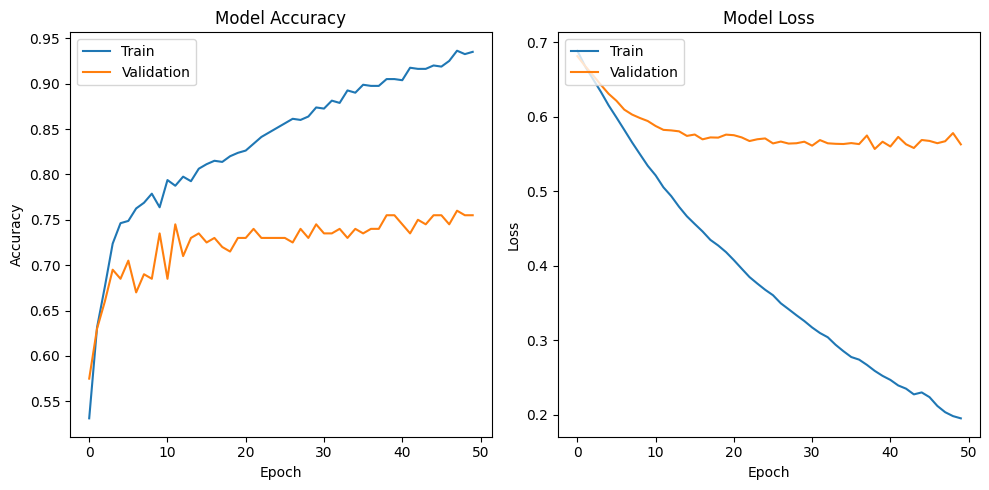

In [49]:
# Summarize history for accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [50]:
y_test = y_test.replace({'Active': 1, 'Inactive': 0})

In [51]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

7/7 - 0s - 23ms/step - accuracy: 0.8400 - loss: 0.4087
Test Accuracy: 0.8400
Test Loss: 0.4087


In [52]:
# Save the model to disk
with open(os.path.join(BASE_FILE_PATH, 'random_forest_model.pkl'), 'wb') as file:
    pickle.dump(random_forest, file)